In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

A partir de la muestra se conseguirá la población del conjunto de datos

In [2]:
data= pd.read_excel("muestra_adopcion.xlsx")

In [3]:
data

,Nombre,Sexo,Raza,Edad,Tamaño,Descripcion,Imagen,Polaridad,clasificacion,cat_abandonado,...,cat_independencia,cat_maltrato,cat_gato,cat_perro,cat_pelo,cat_macho,cat_hembra,cat_ladra,cat_ruido,suma
0,Banzai,Sexo: Macho,Raza: Cruzado,Edad aproximada: 5 años,Tamaño: Mediano,hoy toca presentaros banzai nombre tan especia...,https://www.protectoramalaga.com/imagenes/cata...,0.000,seminegativo,0.188653,...,0.0,0.000000,0.0,-0.092615,0.000000,-0.068950,-0.076102,0.000000,0.000000,1
1,Freya,Sexo: Hembra,Raza: X BODEGUERO,Edad aproximada: Menos de 1 año,Tamaño: Mediano,sólo adopción málaga nombre freya sexo hembra ...,https://www.protectoramalaga.com/imagenes/cata...,0.000,seminegativo,0.081560,...,0.0,0.090532,0.0,-0.179426,0.000000,0.000000,-0.079228,0.000000,0.000000,1
2,Odin,Sexo: Macho,Raza: X BODEGUERO,Edad aproximada: Menos de 1 año,Tamaño: Mediano,sólo adopción málaga nombre odin sexo macho ra...,https://www.protectoramalaga.com/imagenes/cata...,0.000,seminegativo,0.069622,...,0.0,0.077281,0.0,-0.117735,0.000000,-0.071847,0.000000,0.000000,0.000000,1
3,Rambo,Sexo: Macho,Raza: Mestizo,Edad aproximada: 1 años,Tamaño: Grande,rambo mas gusta salir patio jugar pelota corre...,https://www.protectoramalaga.com/imagenes/cata...,0.600,positivo,0.000000,...,0.0,0.000000,0.0,0.090110,0.000000,0.000000,0.000000,0.000000,0.000000,1
4,Cookie,Sexo: Macho,Raza: Pontier mix,Edad aproximada: 1 años,Tamaño: Mediano,cookie perrito activo locuelo lleno energia di...,https://www.protectoramalaga.com/imagenes/cata...,0.000,seminegativo,0.000000,...,0.0,0.000000,0.0,-0.104309,0.000000,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,TRONCO,Sexo: Macho,Raza: Galgo x Podenco,Edad aproximada: 1 años,Tamaño: Grande,tronco edad 140421 altura 65 cm longitud 60 cm...,https://www.protectoramalaga.com/imagenes/cata...,0.000,seminegativo,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
126,ALISA,Sexo: Hembra,Raza: Galgo x Podenco,Edad aproximada: 1 años,Tamaño: Mediano,alisa edad 140421 altura 55 cm longitud 61 cm ...,https://www.protectoramalaga.com/imagenes/cata...,0.000,seminegativo,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
127,Pipiola,Sexo: Hembra,Raza: Mix de pastor alemán,Edad aproximada: 3 años,Tamaño: Mediano,mirar pipiola sentir propio cuerpo sufrimiento...,https://www.protectoramalaga.com/imagenes/cata...,0.000,seminegativo,0.056700,...,0.0,0.117028,0.0,-0.066496,0.000000,0.000000,0.000000,0.000000,0.000000,1
128,Goofy,Sexo: Macho,Raza: Bodeguero,Edad aproximada: 8 años,Tamaño: Mediano,goofy precioso bodeguero 7 añitos llegó protec...,https://www.protectoramalaga.com/imagenes/cata...,0.500,positivo,0.000000,...,0.0,0.034810,0.0,0.052942,0.040176,0.000000,0.000000,0.040176,0.000000,1


##### Selección de columnas para el modelo

Evidentemente todas las de las categorías, además de las descriptivas de animales

In [4]:
data.columns

Index(['Nombre', 'Sexo', 'Raza', 'Edad', 'Tamaño', 'Descripcion', 'Imagen',
       'Polaridad', 'clasificacion', 'cat_abandonado', 'cat_cariño',
       'cat_abuelo', 'cat_cercania', 'cat_acogida', 'cat_actividad',
       'cat_dependencia', 'cat_adaptacion', 'cat_docil', 'cat_agradecido',
       'cat_agresivo', 'cat_tenso', 'cat_alegre', 'cat_inteligencia',
       'cat_miedo', 'cat_convivencia', 'cat_correa', 'cat_carretera',
       'cat_aventura', 'cat_niños', 'cat_belleza', 'cat_ppp', 'cat_bruto',
       'cat_triste', 'cat_cachorro', 'cat_tranquilidad', 'cat_desubicado',
       'cat_recuperacion', 'cat_pequeño', 'cat_grande', 'cat_cronico',
       'cat_historial', 'cat_fortaleza', 'cat_independencia', 'cat_maltrato',
       'cat_gato', 'cat_perro', 'cat_pelo', 'cat_macho', 'cat_hembra',
       'cat_ladra', 'cat_ruido', 'suma'],
      dtype='object')

In [5]:
columnas_interes= ['Nombre', 'Sexo', 'Raza', 'Edad', 'Tamaño',
                   'cat_abandonado', 'cat_cariño','cat_abuelo', 'cat_cercania', 'cat_acogida', 'cat_actividad',
                   'cat_dependencia', 'cat_adaptacion', 'cat_docil', 'cat_agradecido','cat_agresivo', 'cat_tenso', 
                   'cat_alegre', 'cat_inteligencia','cat_miedo', 'cat_convivencia', 'cat_correa', 'cat_carretera',
                   'cat_aventura', 'cat_niños', 'cat_belleza', 'cat_ppp', 'cat_bruto','cat_triste', 'cat_cachorro',
                   'cat_tranquilidad', 'cat_desubicado','cat_recuperacion', 'cat_pequeño', 'cat_grande', 'cat_cronico',
                   'cat_historial', 'cat_fortaleza', 'cat_independencia', 'cat_maltrato', 'cat_gato', 'cat_perro', 
                   'cat_pelo', 'cat_macho', 'cat_hembra', 'cat_ladra', 'cat_ruido']

In [6]:
data_2 = data.loc[:, columnas_interes]

##### Tratamiento de datos

In [7]:
data_2

,Nombre,Sexo,Raza,Edad,Tamaño,cat_abandonado,cat_cariño,cat_abuelo,cat_cercania,cat_acogida,...,cat_fortaleza,cat_independencia,cat_maltrato,cat_gato,cat_perro,cat_pelo,cat_macho,cat_hembra,cat_ladra,cat_ruido
0,Banzai,Sexo: Macho,Raza: Cruzado,Edad aproximada: 5 años,Tamaño: Mediano,0.188653,0.000000,0.054989,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,-0.092615,0.000000,-0.068950,-0.076102,0.000000,0.000000
1,Freya,Sexo: Hembra,Raza: X BODEGUERO,Edad aproximada: Menos de 1 año,Tamaño: Mediano,0.081560,0.052807,0.000000,0.000000,0.257582,...,0.000000,0.0,0.090532,0.0,-0.179426,0.000000,0.000000,-0.079228,0.000000,0.000000
2,Odin,Sexo: Macho,Raza: X BODEGUERO,Edad aproximada: Menos de 1 año,Tamaño: Mediano,0.069622,0.045078,0.000000,0.000000,0.116085,...,0.000000,0.0,0.077281,0.0,-0.117735,0.000000,-0.071847,0.000000,0.000000,0.000000
3,Rambo,Sexo: Macho,Raza: Mestizo,Edad aproximada: 1 años,Tamaño: Grande,0.000000,0.220476,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.090110,0.000000,0.000000,0.000000,0.000000,0.000000
4,Cookie,Sexo: Macho,Raza: Pontier mix,Edad aproximada: 1 años,Tamaño: Mediano,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,-0.104309,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,TRONCO,Sexo: Macho,Raza: Galgo x Podenco,Edad aproximada: 1 años,Tamaño: Grande,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
126,ALISA,Sexo: Hembra,Raza: Galgo x Podenco,Edad aproximada: 1 años,Tamaño: Mediano,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
127,Pipiola,Sexo: Hembra,Raza: Mix de pastor alemán,Edad aproximada: 3 años,Tamaño: Mediano,0.056700,0.035790,0.032621,0.000000,0.000000,...,0.000000,0.0,0.117028,0.0,-0.066496,0.000000,0.000000,0.000000,0.000000,0.000000
128,Goofy,Sexo: Macho,Raza: Bodeguero,Edad aproximada: 8 años,Tamaño: Mediano,0.000000,0.205813,0.020027,0.137633,0.000000,...,0.000000,0.0,0.034810,0.0,0.052942,0.040176,0.000000,0.000000,0.040176,0.000000


Elimino los nombres de los atributos en el campo de los valores porque es redundante:

In [8]:
data_2['Sexo'] = data_2['Sexo'].str.replace('Sexo: ', '')
data_2['Raza'] = data_2['Raza'].str.replace('Raza: ', '')
data_2['Edad'] = data_2['Edad'].str.replace('Edad aproximada: ', '')
data_2['Tamaño'] = data_2['Tamaño'].str.replace('Tamaño: ', '')

In [9]:
data_2

,Nombre,Sexo,Raza,Edad,Tamaño,cat_abandonado,cat_cariño,cat_abuelo,cat_cercania,cat_acogida,...,cat_fortaleza,cat_independencia,cat_maltrato,cat_gato,cat_perro,cat_pelo,cat_macho,cat_hembra,cat_ladra,cat_ruido
0,Banzai,Macho,Cruzado,5 años,Mediano,0.188653,0.000000,0.054989,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,-0.092615,0.000000,-0.068950,-0.076102,0.000000,0.000000
1,Freya,Hembra,X BODEGUERO,Menos de 1 año,Mediano,0.081560,0.052807,0.000000,0.000000,0.257582,...,0.000000,0.0,0.090532,0.0,-0.179426,0.000000,0.000000,-0.079228,0.000000,0.000000
2,Odin,Macho,X BODEGUERO,Menos de 1 año,Mediano,0.069622,0.045078,0.000000,0.000000,0.116085,...,0.000000,0.0,0.077281,0.0,-0.117735,0.000000,-0.071847,0.000000,0.000000,0.000000
3,Rambo,Macho,Mestizo,1 años,Grande,0.000000,0.220476,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.090110,0.000000,0.000000,0.000000,0.000000,0.000000
4,Cookie,Macho,Pontier mix,1 años,Mediano,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,-0.104309,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,TRONCO,Macho,Galgo x Podenco,1 años,Grande,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
126,ALISA,Hembra,Galgo x Podenco,1 años,Mediano,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
127,Pipiola,Hembra,Mix de pastor alemán,3 años,Mediano,0.056700,0.035790,0.032621,0.000000,0.000000,...,0.000000,0.0,0.117028,0.0,-0.066496,0.000000,0.000000,0.000000,0.000000,0.000000
128,Goofy,Macho,Bodeguero,8 años,Mediano,0.000000,0.205813,0.020027,0.137633,0.000000,...,0.000000,0.0,0.034810,0.0,0.052942,0.040176,0.000000,0.000000,0.040176,0.000000


In [10]:
data_2['Raza'].unique()

array(['Cruzado', 'X BODEGUERO', 'Mestizo', 'Pontier mix', 'Podenco',
       'Bodeguero', 'Podenco X', 'Mastín X', 'Podenco Mix',
       'Mastin Español', 'Pastor Belga', 'Mastin X', 'Galgo Español',
       'PODENCO X', 'LABRADOR RETRIEVER X', 'MESTIZO', 'PASTOR X',
       'Pastor belga Tervuerense', 'Mastina', 'fox terrier mix',
       'Amorosos cabezones', 'Amorosos Cabezones',
       'Pastor Belga Malinois', 'X pointer', 'Yorkshire Terrier',
       'Bodeguero X', 'X Husky Siberiano', 'Mestiza', 'X', 'Basenji X',
       'X Pastor Belga.', 'Podenco X Beagle', 'Perro de agua', 'MEZCLADO',
       'Mix de bullterrier', 'Mix bullterrier', 'Podenca',
       'Pastor Alemán X', 'Bichón Maltés', 'Yorkshire',
       'Pastor belga malinois', 'X Pastor del Cáucaso',
       'Labrador X Pastor', 'Pastor Alemán', 'X Sharpei', 'Raza:',
       'Mix malinois', 'X Podenco', 'Bretón español', 'PPP X',
       'Gran Danés X Pastor Alemán', 'Galgo x Podenco',
       'Mix de pastor alemán'], dtype=object)

Los nombres de las razas que se refieran a las mismas, quiero que tengan el mismo nombre para que no haya confusión

In [11]:
# MESTIZO (Mestizo)
data_2.loc[data_2['Raza'].isin(['Cruzado', 'MESTIZO','Mestiza','X','MEZCLADO']), 'Raza'] = 'Mestizo'

# BODEGUERO (Bodeguero)

# CRUCE BODEGUERO
data_2.loc[data_2['Raza'].isin(['X BODEGUERO', 'Bodeguero X']), 'Raza'] = 'Cruce Bodeguero'

# CRUCE POINTER
data_2.loc[data_2['Raza'].isin(['Pontier mix', 'X pointer']), 'Raza'] = 'Cruce Pointer'

# PODENCO (Podenco)
data_2.loc[data_2['Raza'].isin(['Podenca']), 'Raza'] = 'Podenco'

# CRUCE PODENCO
data_2.loc[data_2['Raza'].isin(['Podenco X', 'PODENCO X','Podenco Mix','X Podenco','Podenco X Beagle','Galgo x Podenco']), 'Raza'] =  'Cruce Podenco'

# MASTÍN
data_2.loc[data_2['Raza'].isin(['Mastin Español','Mastina']), 'Raza'] = 'Mastín'

# CRUCE MASTÍN
data_2.loc[data_2['Raza'].isin(['Mastín X','Mastin X']), 'Raza'] = 'Cruce Mastín'

# PASTOR BELGA (Pastor Belga)
data_2.loc[data_2['Raza'].isin(['Pastor belga Tervuerense','Pastor Belga Malinois','Pastor belga malinois']), 'Raza'] = 'Pastor Belga'

# CRUCE PASTOR BELGA
data_2.loc[data_2['Raza'].isin([ 'PASTOR X','X Pastor Belga.','Mix malinois']), 'Raza'] = 'Cruce Pastor Belga'

# PASTOR ALEMÁN (Pastor Alemán)

# CRUCE PASTOR ALEMÁN
data_2.loc[data_2['Raza'].isin([ 'Mix de pastor alemán','Pastor Alemán X','Gran Danés X Pastor Alemán']), 'Raza'] = 'Cruce Pastor Alemán'

# GALGO
data_2.loc[data_2['Raza'].isin(['Galgo Español']), 'Raza'] = 'Galgo'

# CRUCE LABRADOR
data_2.loc[data_2['Raza'].isin(['LABRADOR RETRIEVER X','Labrador X Pastor']), 'Raza'] = 'Cruce Labrador'

# CRUCE FOX TERRIER
data_2.loc[data_2['Raza'].isin(['fox terrier mix']), 'Raza'] = 'Cruce Fox Terrier'

# YORKSHIRE TERRIER (Yorkshire Terrier)
data_2.loc[data_2['Raza'].isin(['Yorkshire']), 'Raza'] = 'Yorkshire Terrier'

# CRUCE HUSKY
data_2.loc[data_2['Raza'].isin(['X Husky Siberiano']), 'Raza'] = 'Cruce Husky'

# CRUCE BASENJI
data_2.loc[data_2['Raza'].isin(['Basenji X']), 'Raza'] = 'Cruce Basenji'

# PERRO DE AGUA (Perro de agua)

# BICKÓN MALTÉS (Bichón Maltés)

# CRUCE PASTOR DEL CÁUCASO
data_2.loc[data_2['Raza'].isin(['X Pastor del Cáucaso']), 'Raza'] = 'Cruce Pastor del Cáucaso'

# CRUCE SHARPEI
data_2.loc[data_2['Raza'].isin(['X Sharpei']), 'Raza'] = 'Cruce Sharpei'

# BRETÓN ESPAÑOL
data_2.loc[data_2['Raza'].isin(['Bretón español']), 'Raza'] = 'Bretón Español'

# CRUCE BULL TERRIER
data_2.loc[data_2['Raza'].isin(['Mix de bullterrier','Mix bullterrier']), 'Raza'] = 'Cruce Bull Terrier'

# CRUCE PPP
data_2.loc[data_2['Raza'].isin(['PPP X']), 'Raza'] = 'Cruce PPP'

# DESCONOCIDA
data_2.loc[data_2['Raza'].isin(['Raza:']), 'Raza'] = 'Desconocida'


In [12]:
data_2['Raza'].unique()

array(['Mestizo', 'Cruce Bodeguero', 'Cruce Pointer', 'Podenco',
       'Bodeguero', 'Cruce Podenco', 'Cruce Mastín', 'Mastín',
       'Pastor Belga', 'Galgo', 'Cruce Labrador', 'Cruce Pastor Belga',
       'Cruce Fox Terrier', 'Amorosos cabezones', 'Amorosos Cabezones',
       'Yorkshire Terrier', 'Cruce Husky', 'Cruce Basenji',
       'Perro de agua', 'Cruce Bull Terrier', 'Cruce Pastor Alemán',
       'Bichón Maltés', 'Cruce Pastor del Cáucaso', 'Pastor Alemán',
       'Cruce Sharpei', 'Desconocida', 'Bretón Español', 'Cruce PPP'],
      dtype=object)

Añadir una columna de especies para eso primero identifico los gatos

In [13]:
data_2['Raza'] = data_2['Raza'].str.replace('Amorosos cabezones', 'Gato')
data_2['Raza'] = data_2['Raza'].str.replace('Amorosos Cabezones', 'Gato')

In [14]:
def evaluar_raza(raza):
    if raza == 'Gato':
        return 'Felina'
    else:
        return 'Canina'

In [15]:
data_2['Especie'] = data_2['Raza'].apply(evaluar_raza)

In [16]:
data_2

,Nombre,Sexo,Raza,Edad,Tamaño,cat_abandonado,cat_cariño,cat_abuelo,cat_cercania,cat_acogida,...,cat_independencia,cat_maltrato,cat_gato,cat_perro,cat_pelo,cat_macho,cat_hembra,cat_ladra,cat_ruido,Especie
0,Banzai,Macho,Mestizo,5 años,Mediano,0.188653,0.000000,0.054989,0.000000,0.000000,...,0.0,0.000000,0.0,-0.092615,0.000000,-0.068950,-0.076102,0.000000,0.000000,Canina
1,Freya,Hembra,Cruce Bodeguero,Menos de 1 año,Mediano,0.081560,0.052807,0.000000,0.000000,0.257582,...,0.0,0.090532,0.0,-0.179426,0.000000,0.000000,-0.079228,0.000000,0.000000,Canina
2,Odin,Macho,Cruce Bodeguero,Menos de 1 año,Mediano,0.069622,0.045078,0.000000,0.000000,0.116085,...,0.0,0.077281,0.0,-0.117735,0.000000,-0.071847,0.000000,0.000000,0.000000,Canina
3,Rambo,Macho,Mestizo,1 años,Grande,0.000000,0.220476,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.090110,0.000000,0.000000,0.000000,0.000000,0.000000,Canina
4,Cookie,Macho,Cruce Pointer,1 años,Mediano,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,-0.104309,0.000000,0.000000,0.000000,0.000000,0.000000,Canina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,TRONCO,Macho,Cruce Podenco,1 años,Grande,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Canina
126,ALISA,Hembra,Cruce Podenco,1 años,Mediano,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Canina
127,Pipiola,Hembra,Cruce Pastor Alemán,3 años,Mediano,0.056700,0.035790,0.032621,0.000000,0.000000,...,0.0,0.117028,0.0,-0.066496,0.000000,0.000000,0.000000,0.000000,0.000000,Canina
128,Goofy,Macho,Bodeguero,8 años,Mediano,0.000000,0.205813,0.020027,0.137633,0.000000,...,0.0,0.034810,0.0,0.052942,0.040176,0.000000,0.000000,0.040176,0.000000,Canina


EL CONJUNTO data_2 SERÍA LA MUESTRA A PARTIR DE LA CUAL SE REALIZARÁ LA POBLACIÓN

##### Análisis de la distribución de las variables y generación y comprobación de la distribución de la población

In [17]:
data_2.columns

Index(['Nombre', 'Sexo', 'Raza', 'Edad', 'Tamaño', 'cat_abandonado',
       'cat_cariño', 'cat_abuelo', 'cat_cercania', 'cat_acogida',
       'cat_actividad', 'cat_dependencia', 'cat_adaptacion', 'cat_docil',
       'cat_agradecido', 'cat_agresivo', 'cat_tenso', 'cat_alegre',
       'cat_inteligencia', 'cat_miedo', 'cat_convivencia', 'cat_correa',
       'cat_carretera', 'cat_aventura', 'cat_niños', 'cat_belleza', 'cat_ppp',
       'cat_bruto', 'cat_triste', 'cat_cachorro', 'cat_tranquilidad',
       'cat_desubicado', 'cat_recuperacion', 'cat_pequeño', 'cat_grande',
       'cat_cronico', 'cat_historial', 'cat_fortaleza', 'cat_independencia',
       'cat_maltrato', 'cat_gato', 'cat_perro', 'cat_pelo', 'cat_macho',
       'cat_hembra', 'cat_ladra', 'cat_ruido', 'Especie'],
      dtype='object')

Dataframe vacío de la población al que le iré añadiendo los datos sintéticos

In [18]:
poblacion=  pd.DataFrame(columns=data_2.columns)

**a. DATOS CATEGÓRICOS**

1. SEXO

In [19]:
# Obtener los valores únicos y sus frecuencias de la variable
unique_vals_sexo, counts_sexo = np.unique(data_2['Sexo'], return_counts=True)

In [20]:
unique_vals_sexo

array(['Hembra', 'Macho'], dtype=object)

In [21]:
counts_sexo

array([62, 68], dtype=int64)

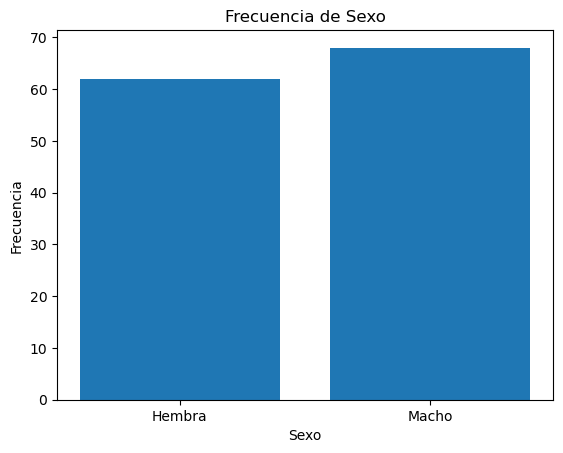

In [22]:
# Crear el gráfico de barras
plt.bar(unique_vals_sexo , counts_sexo)

# Añadir etiquetas
plt.title('Frecuencia de Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [23]:
# POBLACIÓN
poblacion['Sexo'] = np.random.choice(unique_vals_sexo, size=500000, p=counts_sexo/len(data_2))

In [24]:
unique_vals_sexo_pob, counts_sexo_pob = np.unique(poblacion['Sexo'], return_counts=True)

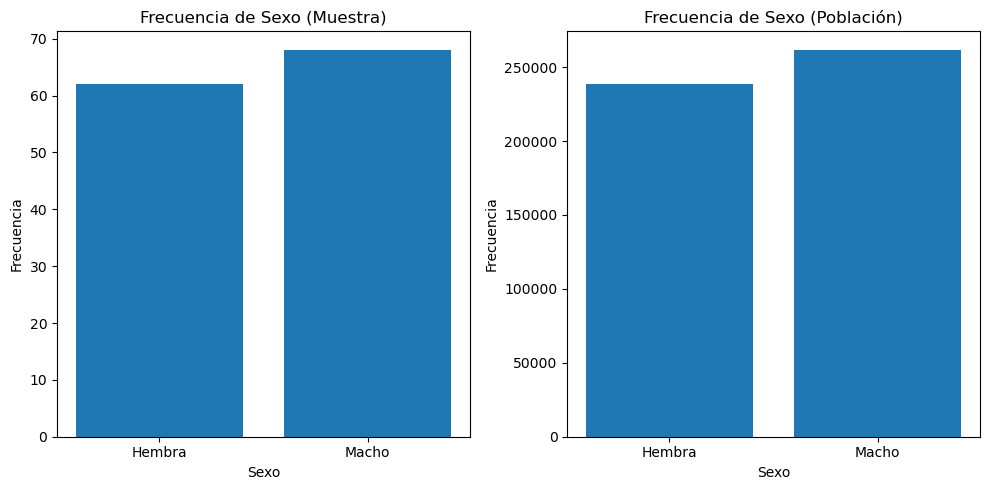

In [25]:
# Crear la figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Agregar el gráfico de barras para la muestra en el primer subplot
ax1.bar(unique_vals_sexo, counts_sexo)
ax1.set_title('Frecuencia de Sexo (Muestra)')
ax1.set_xlabel('Sexo')
ax1.set_ylabel('Frecuencia')

# Agregar el gráfico de barras para la población en el segundo subplot
ax2.bar(unique_vals_sexo_pob, counts_sexo_pob)
ax2.set_title('Frecuencia de Sexo (Población)')
ax2.set_xlabel('Sexo')
ax2.set_ylabel('Frecuencia')

# Ajustar los subplots para que no se superpongan
fig.tight_layout()

# Mostrar la figura
plt.show()

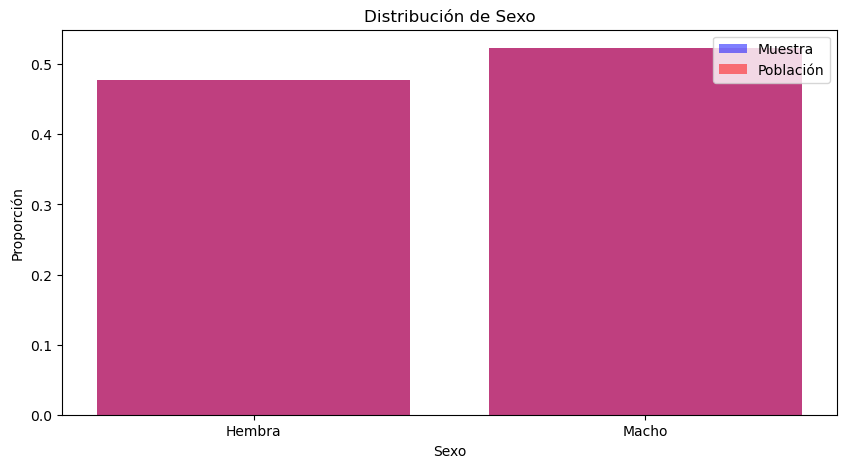

In [26]:
# Calcular las proporciones de la muestra y la población
prop_muestra = counts_sexo / len(data_2)
prop_poblacion = counts_sexo_pob / len(poblacion)

# Crear la figura
fig, ax = plt.subplots(figsize=(10, 5))

# Agregar el gráfico de barras para la muestra
ax.bar(unique_vals_sexo, prop_muestra, color='blue', alpha=0.5, label='Muestra')

# Agregar el gráfico de barras para la población
ax.bar(unique_vals_sexo_pob, prop_poblacion, color='red', alpha=0.5, label='Población')

# Añadir etiquetas y leyenda
ax.set_title('Distribución de Sexo')
ax.set_xlabel('Sexo')
ax.set_ylabel('Proporción')
ax.legend()

# Mostrar la figura
plt.show()

2. ESPECIE

In [28]:
unique_vals_especie, counts_especie = np.unique(data_2['Especie'], return_counts=True)

In [29]:
unique_vals_especie

array(['Canina', 'Felina'], dtype=object)

In [30]:
counts_especie

array([116,  14], dtype=int64)

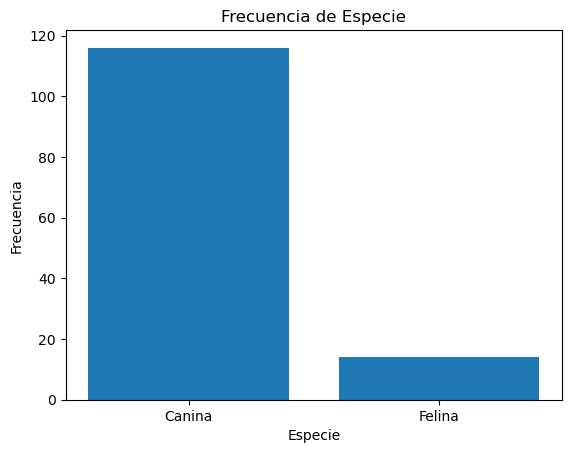

In [31]:
# Crear el gráfico de barras
plt.bar(unique_vals_especie , counts_especie)

# Añadir etiquetas
plt.title('Frecuencia de Especie')
plt.xlabel('Especie')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [31]:
# POBLACIÓN

La población de especie la sacaré mediante la raza porque si no los datos no van a tener coherencia

3. RAZA

In [33]:
unique_vals_raza, counts_raza = np.unique(data_2['Raza'], return_counts=True)

In [34]:
unique_vals_raza

array(['Bichón Maltés', 'Bodeguero', 'Bretón Español', 'Cruce Basenji',
       'Cruce Bodeguero', 'Cruce Bull Terrier', 'Cruce Fox Terrier',
       'Cruce Husky', 'Cruce Labrador', 'Cruce Mastín', 'Cruce PPP',
       'Cruce Pastor Alemán', 'Cruce Pastor Belga',
       'Cruce Pastor del Cáucaso', 'Cruce Podenco', 'Cruce Pointer',
       'Cruce Sharpei', 'Desconocida', 'Galgo', 'Gato', 'Mastín',
       'Mestizo', 'Pastor Alemán', 'Pastor Belga', 'Perro de agua',
       'Podenco', 'Yorkshire Terrier'], dtype=object)

In [35]:
counts_raza

array([ 1,  3,  1,  1,  4,  2,  1,  1,  2,  6,  1,  5,  5,  1, 15,  2,  1,
        4,  1, 14,  4, 17,  3,  5,  1, 27,  2], dtype=int64)

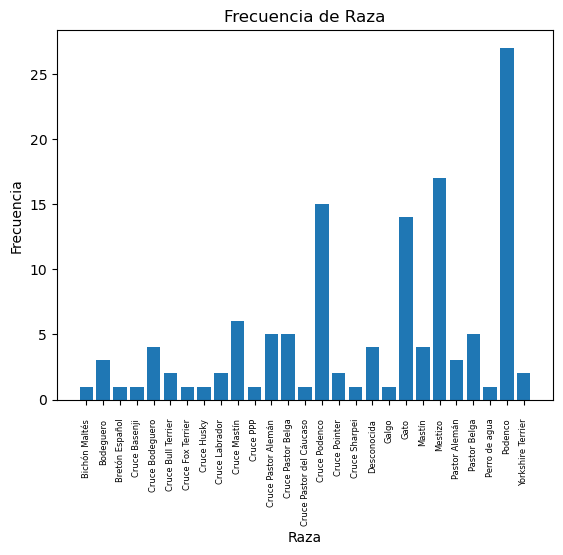

In [36]:
# Crear el gráfico de barras
plt.bar(unique_vals_raza , counts_raza)

# Añadir etiquetas
plt.title('Frecuencia de Raza')
plt.xlabel('Raza')
plt.ylabel('Frecuencia')

plt.xticks(rotation=90)

# Ajusta el espaciado y tamaño de las etiquetas del eje x
plt.tick_params(axis='x', which='major', labelsize=6, pad=10)

# Mostrar el gráfico
plt.show()

In [37]:
# POBLACIÓN
poblacion['Raza'] = np.random.choice(unique_vals_raza, size=500000, p=counts_raza/len(data_2))

In [38]:
poblacion

,Nombre,Sexo,Raza,Edad,Tamaño,cat_abandonado,cat_cariño,cat_abuelo,cat_cercania,cat_acogida,...,cat_independencia,cat_maltrato,cat_gato,cat_perro,cat_pelo,cat_macho,cat_hembra,cat_ladra,cat_ruido,Especie
0,NaN,Macho,Bodeguero,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Hembra,Mestizo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Hembra,Pastor Belga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Macho,Mastín,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Macho,Podenco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,NaN,Macho,Mestizo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
499996,NaN,Macho,Galgo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
499997,NaN,Hembra,Cruce Pointer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
499998,NaN,Macho,Cruce Podenco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


3. EDAD

In [39]:
unique_vals_edad, counts_edad = np.unique(data_2['Edad'], return_counts=True)

In [40]:
# Crear una lista de tuplas con los valores únicos y la frecuencia
edades_frecuencia = list(zip(unique_vals_edad, counts_edad))

# Ordenar la lista de tuplas por el valor numérico del año
edades_frecuencia.sort(key=lambda x: 0 if x[0] == 'Menos de 1 año' else int(x[0].split()[0]))

In [41]:
# Extraer los años y las frecuencias en listas separadas
años_ordenados = [x[0] for x in edades_frecuencia]
frecuencias = [x[1] for x in edades_frecuencia]

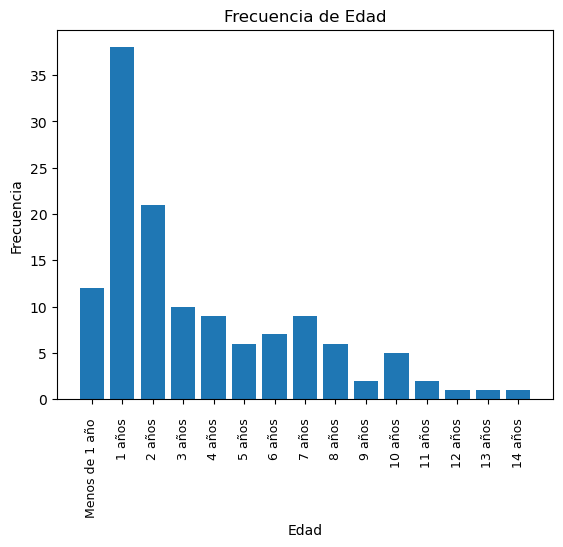

In [42]:
# Crear el gráfico de barras
plt.bar(años_ordenados, frecuencias)

# Añadir etiquetas
plt.title('Frecuencia de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

plt.xticks(rotation=90)

# Ajusta el espaciado y tamaño de las etiquetas del eje x
plt.tick_params(axis='x', which='major', labelsize=9, pad=10)

# Mostrar el gráfico
plt.show()

In [43]:
# POBLACIÓN
poblacion['Edad'] = np.random.choice(unique_vals_edad, size=500000, p=counts_edad/len(data_2))

**b. DATOS NUMÉRICOS (Puntuaciones correspondientes a las categorías)**

Guardo la parte de las puntuaciones de data_2 en otro df para trabajar más comodamente

In [44]:
data_2.columns

Index(['Nombre', 'Sexo', 'Raza', 'Edad', 'Tamaño', 'cat_abandonado',
       'cat_cariño', 'cat_abuelo', 'cat_cercania', 'cat_acogida',
       'cat_actividad', 'cat_dependencia', 'cat_adaptacion', 'cat_docil',
       'cat_agradecido', 'cat_agresivo', 'cat_tenso', 'cat_alegre',
       'cat_inteligencia', 'cat_miedo', 'cat_convivencia', 'cat_correa',
       'cat_carretera', 'cat_aventura', 'cat_niños', 'cat_belleza', 'cat_ppp',
       'cat_bruto', 'cat_triste', 'cat_cachorro', 'cat_tranquilidad',
       'cat_desubicado', 'cat_recuperacion', 'cat_pequeño', 'cat_grande',
       'cat_cronico', 'cat_historial', 'cat_fortaleza', 'cat_independencia',
       'cat_maltrato', 'cat_gato', 'cat_perro', 'cat_pelo', 'cat_macho',
       'cat_hembra', 'cat_ladra', 'cat_ruido', 'Especie'],
      dtype='object')

Las categorías abuelo, cachorro, ppp, pequeño y grande las elimino porque ya constan en otra parte del dataset.

In [45]:
columnas_cat= ['cat_abandonado','cat_cariño',  'cat_cercania', 'cat_acogida','cat_actividad','cat_dependencia',
               'cat_adaptacion', 'cat_docil','cat_agradecido', 'cat_agresivo','cat_tenso', 'cat_alegre',
               'cat_inteligencia', 'cat_miedo', 'cat_convivencia', 'cat_correa','cat_carretera', 'cat_aventura', 
               'cat_niños', 'cat_belleza', 'cat_bruto', 'cat_triste',  'cat_tranquilidad','cat_desubicado', 
               'cat_recuperacion', 'cat_cronico', 'cat_historial', 'cat_fortaleza', 'cat_independencia','cat_maltrato',
               'cat_gato', 'cat_perro', 'cat_pelo', 'cat_macho','cat_hembra', 'cat_ladra', 'cat_ruido']

In [46]:
data_cat = data_2.loc[:, columnas_cat]

In [47]:
data_cat

,cat_abandonado,cat_cariño,cat_cercania,cat_acogida,cat_actividad,cat_dependencia,cat_adaptacion,cat_docil,cat_agradecido,cat_agresivo,...,cat_fortaleza,cat_independencia,cat_maltrato,cat_gato,cat_perro,cat_pelo,cat_macho,cat_hembra,cat_ladra,cat_ruido
0,0.188653,0.000000,0.000000,0.000000,0.174519,0.000000,0.000000,0.000000,0.110312,0.0,...,0.000000,0.0,0.000000,0.0,-0.092615,0.000000,-0.068950,-0.076102,0.000000,0.000000
1,0.081560,0.052807,0.000000,0.257582,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.090532,0.0,-0.179426,0.000000,0.000000,-0.079228,0.000000,0.000000
2,0.069622,0.045078,0.000000,0.116085,0.062675,0.000000,0.000000,0.065831,0.000000,0.0,...,0.000000,0.0,0.077281,0.0,-0.117735,0.000000,-0.071847,0.000000,0.000000,0.000000
3,0.000000,0.220476,0.000000,0.000000,0.120475,0.163273,0.000000,0.000000,0.130001,0.0,...,0.000000,0.0,0.000000,0.0,0.090110,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.292484,0.150802,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,-0.104309,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
126,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
127,0.056700,0.035790,0.000000,0.000000,0.000000,0.000000,0.060328,0.121409,0.104660,0.0,...,0.000000,0.0,0.117028,0.0,-0.066496,0.000000,0.000000,0.000000,0.000000,0.000000
128,0.000000,0.205813,0.137633,0.000000,0.083964,0.000000,0.000000,0.000000,0.024078,0.0,...,0.000000,0.0,0.034810,0.0,0.052942,0.040176,0.000000,0.000000,0.040176,0.000000


In [48]:
unique_vals_cat_abandonado, counts_cat_abandonado = np.unique(data_cat['cat_abandonado'], return_counts=True)

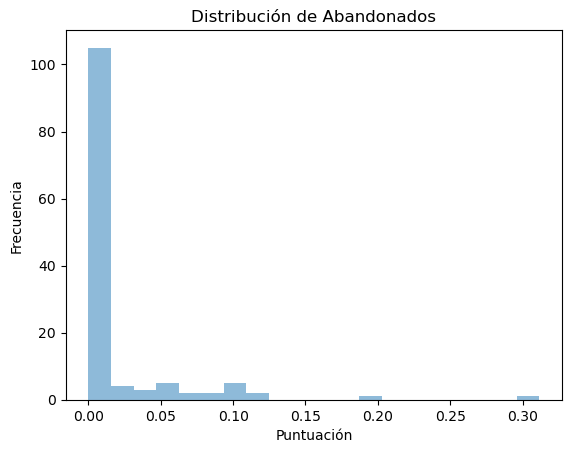

In [51]:
plt.hist(data_cat['cat_abandonado'], bins=20, alpha=0.5)
plt.title('Distribución de Abandonados')
plt.xlabel('Puntuación')
plt.ylabel('Frecuencia')
plt.show()

**c. POBLACIÓN DE VARIABLES MÁS COMPLEJAS**

Quedaría solamente la población de las variables correspondientes a las categorías, a la especie (basandonos en la edad) y a los nombres de los animales. También combiene crear una columna correspondiente a un identificador

1. ESPECIE

La función que ya programé antes, la voy a aplicar a los datos de la población

In [52]:
poblacion['Especie'] = poblacion['Raza'].apply(evaluar_raza)    

Como los valores de especie no fueron exactamente generados basándonos en la distribución de la variable, voy a comparar las frecuencias para comprobar que no distan demasiado:

In [53]:
unique_vals_especie_pob, counts_especie_pob = np.unique(poblacion['Especie'], return_counts=True)

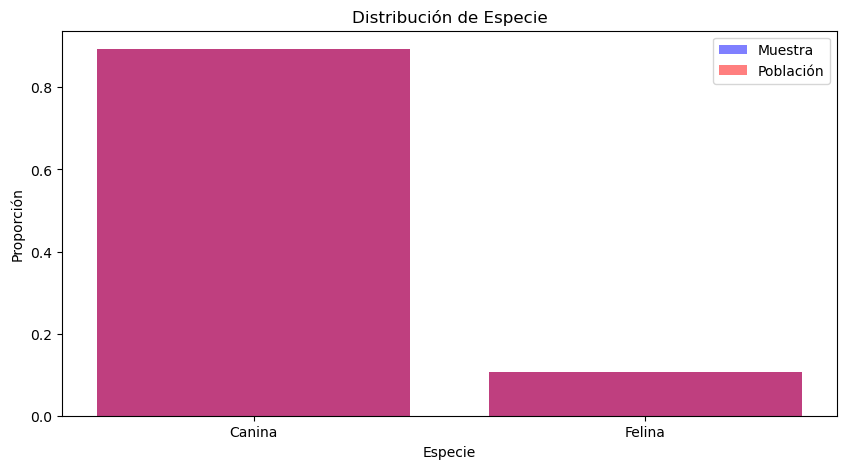

In [54]:
# Calcular las proporciones de la muestra y la población
prop_muestra = counts_especie / len(data_2)
prop_poblacion = counts_especie_pob / len(poblacion)

# Crear la figura
fig, ax = plt.subplots(figsize=(10, 5))

# Agregar el gráfico de barras para la muestra
ax.bar(unique_vals_especie, prop_muestra, color='blue', alpha=0.5, label='Muestra')

# Agregar el gráfico de barras para la población
ax.bar(unique_vals_especie_pob, prop_poblacion, color='red', alpha=0.5, label='Población')

# Añadir etiquetas y leyenda
ax.set_title('Distribución de Especie')
ax.set_xlabel('Especie')
ax.set_ylabel('Proporción')
ax.legend()

# Mostrar la figura
plt.show()

Se ha conseguido que la distribución sea idéntico lo cual tiene lógica porque los valores de esta variable dependen directamente de la variable raza que también tiene distribución idéntica

2. TAMAÑO

En cuanto al tamaño, tengo que diferenciar la muestra entre perros y gatos, los gatos siempre serán pequeños , de los perros es de quien tengo que estudiar la distribución y asociar los valores correspondientes

In [55]:
unique_vals_tamaño= np.unique(data_2['Tamaño'])

In [56]:
unique_vals_tamaño

array(['Grande', 'Mediano', 'Muy Grande', 'Pequeño'], dtype=object)

In [57]:
poblacion

,Nombre,Sexo,Raza,Edad,Tamaño,cat_abandonado,cat_cariño,cat_abuelo,cat_cercania,cat_acogida,...,cat_independencia,cat_maltrato,cat_gato,cat_perro,cat_pelo,cat_macho,cat_hembra,cat_ladra,cat_ruido,Especie
0,NaN,Macho,Bodeguero,4 años,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canina
1,NaN,Hembra,Mestizo,1 años,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canina
2,NaN,Hembra,Pastor Belga,2 años,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canina
3,NaN,Macho,Mastín,10 años,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canina
4,NaN,Macho,Podenco,12 años,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,NaN,Macho,Mestizo,Menos de 1 año,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canina
499996,NaN,Macho,Galgo,6 años,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canina
499997,NaN,Hembra,Cruce Pointer,1 años,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canina
499998,NaN,Macho,Cruce Podenco,1 años,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canina


In [58]:
poblacion.loc[poblacion['Especie'] == 'Felina', 'Tamaño'] = 'Pequeño'

In [60]:
# Muestra solo de la especie canina para sacar frecuencias de ella
data_2_canina = data_2.loc[data_2['Especie'] == 'Canina']

In [61]:
unique_vals_tamaño_canina, counts_tamaño_canina = np.unique(data_2_canina['Tamaño'], return_counts=True)

In [62]:
unique_vals_tamaño_canina

array(['Grande', 'Mediano', 'Muy Grande', 'Pequeño'], dtype=object)

In [63]:
counts_tamaño_canina

array([28, 72,  3, 13], dtype=int64)

In [65]:
poblacion.loc[poblacion['Especie'] == 'Canina', 'Tamaño'] = np.random.choice(unique_vals_tamaño_canina,p=counts_tamaño_canina/len(data_2_canina))

3. IDENTIFICADOR

In [66]:
poblacion['id_adopcion'] = (poblacion.index + 1).astype(str).str.zfill(6)

4. NOMBRES

In [67]:
from mimesis import Person
from mimesis.enums import Gender

In [68]:
person= Person(locale='es')

In [69]:
def nombre_animal(row):
    gender = row['Sexo'].lower()
    if gender == 'macho':
        return person.first_name(gender=Gender.MALE)
    elif gender == 'hembra':
        return person.first_name(gender=Gender.FEMALE)

In [70]:
poblacion['Nombre'] = poblacion.apply(nombre_animal, axis=1)

5. CATEGORÍAS

In [71]:
poblacion.columns

Index(['Nombre', 'Sexo', 'Raza', 'Edad', 'Tamaño', 'cat_abandonado',
       'cat_cariño', 'cat_abuelo', 'cat_cercania', 'cat_acogida',
       'cat_actividad', 'cat_dependencia', 'cat_adaptacion', 'cat_docil',
       'cat_agradecido', 'cat_agresivo', 'cat_tenso', 'cat_alegre',
       'cat_inteligencia', 'cat_miedo', 'cat_convivencia', 'cat_correa',
       'cat_carretera', 'cat_aventura', 'cat_niños', 'cat_belleza', 'cat_ppp',
       'cat_bruto', 'cat_triste', 'cat_cachorro', 'cat_tranquilidad',
       'cat_desubicado', 'cat_recuperacion', 'cat_pequeño', 'cat_grande',
       'cat_cronico', 'cat_historial', 'cat_fortaleza', 'cat_independencia',
       'cat_maltrato', 'cat_gato', 'cat_perro', 'cat_pelo', 'cat_macho',
       'cat_hembra', 'cat_ladra', 'cat_ruido', 'Especie', 'id_adopcion'],
      dtype='object')

In [72]:
columnas_cat_poblacion= ['cat_abandonado',
       'cat_cariño', 'cat_abuelo', 'cat_cercania', 'cat_acogida',
       'cat_actividad', 'cat_dependencia', 'cat_adaptacion', 'cat_docil',
       'cat_agradecido', 'cat_agresivo', 'cat_tenso', 'cat_alegre',
       'cat_inteligencia', 'cat_miedo', 'cat_convivencia', 'cat_correa',
       'cat_carretera', 'cat_aventura', 'cat_niños', 'cat_belleza', 'cat_ppp',
       'cat_bruto', 'cat_triste', 'cat_cachorro', 'cat_tranquilidad',
       'cat_desubicado', 'cat_recuperacion', 'cat_pequeño', 'cat_grande',
       'cat_cronico', 'cat_historial', 'cat_fortaleza', 'cat_independencia',
       'cat_maltrato', 'cat_gato', 'cat_perro', 'cat_pelo', 'cat_macho',
       'cat_hembra', 'cat_ladra', 'cat_ruido']

In [73]:
# iterar sobre las columnas
for col in columnas_cat_poblacion:
    # obtener los valores únicos y las frecuencias
    unique_vals, counts = np.unique(data_2[col], return_counts=True)
    # generar una muestra aleatoria con las mismas frecuencias
    poblacion[col] = np.random.choice(unique_vals, size=500000, p=counts/len(data_2))

Me quedo solamente con la parte de la poblacion de las categorías:

In [74]:
poblacion_cat = poblacion.loc[:, columnas_cat_poblacion]

In [75]:
poblacion = poblacion.drop(columns=columnas_cat_poblacion)

Ahora siguiendo los pasos que ya había programado anteriormente, voy a ajustar los datos de las categorías por filas para que todas sumen 1:

In [76]:
poblacion_cat['suma'] = pd.DataFrame(poblacion_cat.abs().sum(axis=1))

In [77]:
if poblacion_cat.isnull().any().any():
    print('El DataFrame tiene valores nulos')
else:
    print('El DataFrame no tiene valores nulos')

El DataFrame no tiene valores nulos


In [78]:
def comprobar_suma_columnas(df, columnas):
    for col in columnas:
        if abs(df[col].sum()) == 0:
            return False
    return True

In [79]:
if comprobar_suma_columnas(poblacion_cat,columnas_cat_poblacion ):
    print("La suma en valor absoluto de las columnas es distinta de cero")
else:
    print("La suma en valor absoluto de al menos una columna es cero")

La suma en valor absoluto de las columnas es distinta de cero


In [80]:
# número de columnas del dataframe
num_cols_poblacion_cat = poblacion_cat.shape[1]

In [81]:
# dividir cada valor de cada columna por el valor de la última columna
poblacion_cat = poblacion_cat.div(poblacion_cat.iloc[:, num_cols_poblacion_cat - 1], axis=0)

In [82]:
poblacion= pd.concat([poblacion, poblacion_cat], axis=1)

In [83]:
poblacion

,Nombre,Sexo,Raza,Edad,Tamaño,Especie,id_adopcion,cat_abandonado,cat_cariño,cat_abuelo,...,cat_independencia,cat_maltrato,cat_gato,cat_perro,cat_pelo,cat_macho,cat_hembra,cat_ladra,cat_ruido,suma
0,Andrés,Macho,Bodeguero,4 años,Mediano,Canina,000001,0.083918,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0
1,Hortensia,Hembra,Mestizo,1 años,Mediano,Canina,000002,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.052836,0.000000,0.000000,-0.073742,0.0,0.0,1.0
2,Angélica,Hembra,Pastor Belga,2 años,Mediano,Canina,000003,0.000000,0.000000,0.135819,...,0.000000,0.000000,0.000000,0.307135,0.000000,0.000000,0.000000,0.0,0.0,1.0
3,Hilario,Macho,Mastín,10 años,Mediano,Canina,000004,0.050932,0.000000,0.175044,...,0.000000,0.000000,0.073939,0.065000,0.000000,0.000000,0.000000,0.0,0.0,1.0
4,Jose luis,Macho,Podenco,12 años,Mediano,Canina,000005,0.000000,0.224509,0.000000,...,0.000000,0.000000,0.000000,0.113679,0.000000,0.000000,0.000000,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,Marcelo,Macho,Mestizo,Menos de 1 año,Mediano,Canina,499996,0.000000,0.055907,0.000000,...,0.047283,0.000000,0.000000,0.196178,0.000000,0.000000,0.000000,0.0,0.0,1.0
499996,Lautaro,Macho,Galgo,6 años,Mediano,Canina,499997,0.000000,0.038663,0.043939,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0
499997,Evita,Hembra,Cruce Pointer,1 años,Mediano,Canina,499998,0.463434,0.000000,0.000000,...,0.000000,0.051768,0.000000,-0.102972,0.059748,0.000000,0.022838,0.0,0.0,1.0
499998,Sebastián,Macho,Cruce Podenco,1 años,Mediano,Canina,499999,0.000000,0.053711,0.000000,...,0.000000,0.080343,-0.035020,0.000000,0.000000,0.021526,0.000000,0.0,0.0,1.0


In [84]:
poblacion.to_csv('poblacion_adopcion_OK.csv', index=False)